# Biological Neuronal Networks: The Leaky Integrate-and-Fire (LIF) Neuronal Network

__Referred from:__ [Brian2 documantations](https://brian2.readthedocs.io/en/stable/)

__Content modified:__ Kai Chen 


In [1]:
#@title load matplotlib and rcParams
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("https://raw.githubusercontent.com/NeoNeuron/professional-workshop-3/master/nma.mplstyle")

In /Users/kchen/.matplotlib/stylelib/dark.mplstyle: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/kchen/.matplotlib/stylelib/dark.mplstyle: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/kchen/.matplotlib/stylelib/dark.mplstyle: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/kchen/.matplotlib/stylelib/dark.mplstyle: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/kchen/.matplotlib/stylelib/dark.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/kchen/.matplotlib/stylelib/dark.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases lat

## Import functions and classes in Brian2

All Brian scripts start with the following.

In [2]:
from brian2 import *

## Units system

Brian has a system for using quantities with physical dimensions. 

The base units are defined by their standard **SI** unit names: `amp`/`ampere`, `kilogram`/`kilogramme`, `second`, `metre`/`meter`, `mole`/`mol`, `kelvin`, and `candela`. 

In addition to these base units, Brian defines a set of derived units: `coulomb`, `farad`, `gram`/`gramme`, `hertz`, `joule`, `liter`/`litre`, `molar`, `pascal`, `ohm`, `siemens`, `volt`, `watt`, together with prefixed versions (e.g. `msiemens` = `0.001*siemens`) using the prefixes `p`, `n`, `u`, `m`, `k`, `M`, `G`, `T` (two exceptions to this rule: `kilogram` is not defined with any additional prefixes, and `metre` and meter are additionaly defined with the “`centi`” prefix, i.e. `cmetre`/`cmeter`). 

For convenience, a couple of additional useful standard abbreviations such as `cm` (instead of `cmetre`/`cmeter`), `nS` (instead of `nsiemens`), `ms` (instead of `msecond`), `Hz` (instead of `hertz`), `mM` (instead of `mmolar`) are included. To avoid clashes with common variable names, no one-letter abbreviations are provided (e.g. you can use `mV` or `nS`, but not `V` or `S`).

Let's try a few of them!

In [3]:
20*volt

20. * volt

In [4]:
1000*amp

1. * kamp

In [5]:
1e6*volt

1. * Mvolt

In [6]:
1000*namp

1. * uamp

Also note that combinations of units with work as expected:

In [7]:
10*nA*5*Mohm

50. * mvolt

And if you try to do something wrong like adding amps and volts, what happens?

## Build A Leaky Integrate-and-Fire Neuron from the ground

In Brian, all models are defined by systems of differential equations. Here's the first simple example:

consider the LIF neuron defined as:

$$
C_m\frac{dv}{dt} = -g_L(v-E_L) + I_{ext}
$$

In [8]:
start_scope()

# define neuronal parameters
C_m = 0.5*nF
g_L = 50*nS
E_L = -75*mV 
V_rest = E_L
I_ext = 1*nA

# using multi-line string to define the system of ODE for our LIF model
eqs = '''
dv/dt = (-g_L*(v-E_L) + I_ext)/ C_m : volt
'''

G = NeuronGroup(1, eqs, method='exact')
G.v = V_rest    # set initial value of v
run(30*ms)

In Python, the notation ``'''`` is used to begin and end a multi-line string. So the equations are just a string with one line per equation. The equations are formatted with standard mathematical notation, with one addition. At the end of a line you write ``: unit`` where ``unit`` is the SI unit of that variable.
Note that this is not the unit of the two sides of the equation (which would be ``1/second``), but the unit of the *variable* defined by the equation, i.e. in this case $v$.

First off, ignore that ``start_scope()`` at the top of the cell. You'll see that in each cell in this tutorial where we run a simulation. All it does is make sure that any Brian objects created before the function is called aren't included in the next run of the simulation.

Secondly, you'll see that there is an "INFO" message about not specifying the numerical integration method. This is harmless and just to let you know what method we chose, but we'll fix it in the next cell by specifying the method explicitly.

So, what has happened here? Well, the command ``run(30*ms)`` runs the simulation for 30 ms.

Now let's take a look at a graph of how the variable ``v`` evolves over time.

Before simulation: v = -75.00 mV
After simulation:  v = -55.00 mV


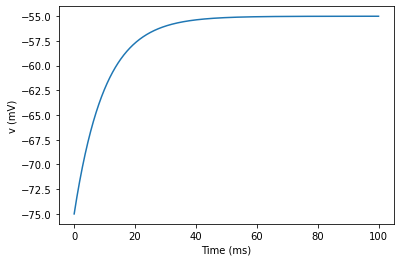

In [9]:
start_scope()

# defineriable monitor to record state of v
G = NeuronGroup(1, eqs, method='exact')
G.v = V_rest
M = StateMonitor(G, 'v', record=True)

print('Before simulation: v = %5.2f mV' % (G.v[0]/mV))
run(100*ms)
print('After simulation:  v = %5.2f mV' % (G.v[0]/mV))

# plot the trace of V
plt.plot(M.t/ms, M.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)');

In this example, we used the object ``StateMonitor`` object. This is used to record the values of a neuron variable while the simulation runs. The first two arguments are the group to record from, and the variable you want to record from. We also specify ``record=0``. This means that we record all values for neuron 0. We have to specify which neurons we want to record because in large simulations with many neurons it usually uses up too much RAM to record the values of all neurons.

Now try modifying the equations and parameters and see what happens in the cell below.

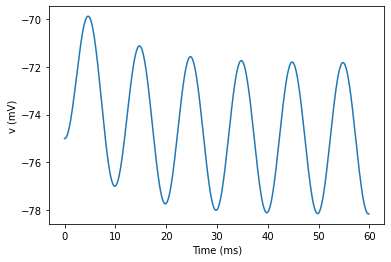

In [10]:
start_scope()

# change external constant drive to sine wave.
eqs_sine = '''
dv/dt = ( -g_L*(v-E_L) + I_ext*sin(2*pi*100*Hz*t) ) / C_m : volt
'''

# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs_sine, method='euler')
M = StateMonitor(G, 'v', record=0)

G.v = V_rest # initial value

run(60*ms)

plt.plot(M.t/ms, M.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)');

## Adding spikes

So far we haven't done anything neuronal, just played around with differential equations. Now let's start adding spiking behaviour.

Spike times: [ 6.9 13.9 20.9 27.9 34.9 41.9 48.9] ms


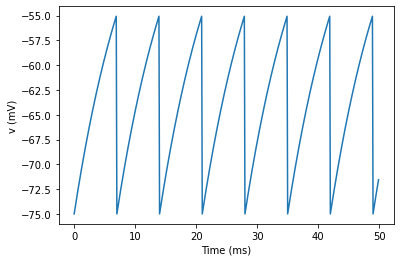

In [11]:
start_scope()

I_ext = 2*nA    # larger external drive to ensure firing
V_th = -55*mV
V_reset = V_rest

G = NeuronGroup(1, eqs, threshold='v>V_th', reset='v = V_reset', method='exact')
G.v = V_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)
plt.plot(M.t/ms, M.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)')

print('Spike times: %s' % spikemon.t[:])

We've added two new keywords to the ``NeuronGroup`` declaration: ``threshold='v>V_th'`` and ``reset='v = V_reset'``. What this means is that when ``v>V_th`` we fire a spike, and immediately reset ``v = V_reset`` after the spike. We can put any expression and series of statements as these strings.

As you can see, at the beginning the behaviour is the same as before until ``v`` crosses the threshold ``v>V_th`` at which point you see it reset to 0. You can't see it in this figure, but internally Brian has registered this event as a spike. Let's have a look at that.

The ``SpikeMonitor`` object takes the group whose spikes you want to record as its argument and stores the spike times in the variable ``t``. Let's plot those spikes on top of the other figure to see that it's getting it right.

Now try changing the strings for ``threshold`` and ``reset`` in the cell above to see what happens.

## Refractoriness

A common feature of neuron models is refractoriness. This means that after the neuron fires a spike it becomes refractory for a certain duration and cannot fire another spike until this period is over. Here's how we do that in Brian.

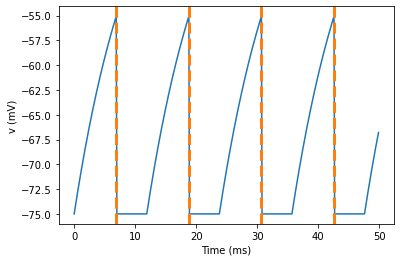

In [12]:
start_scope()

I_ext = 2*nA    # larger external drive to ensure firing
V_th = -55*mV
V_reset = V_rest

eqs = '''
dv/dt = (-g_L*(v-E_L) + I_ext)/ C_m : volt (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>V_th', reset='v = V_reset', refractory=5*ms, method='exact')
G.v = V_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)
plt.plot(M.t/ms, M.v[0]/mV)
for t in spikemon.t:
    plt.axvline(t/ms, ls='--', c='C1', lw=3)   # using matplotlib.pyplot.axvline to indicate spike times
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)');

As you can see in this figure, after the first spike, ``v`` stays at 0 for around 5 ms before it resumes its normal behaviour. To do this, we've done two things. Firstly, we've added the keyword ``refractory=5*ms`` to the ``NeuronGroup`` declaration. On its own, this only means that the neuron cannot spike in this period (see below), but doesn't change how ``v`` behaves. In order to make ``v`` stay constant during the refractory period, we have to add ``(unless refractory)`` to the end of the definition of ``v`` in the differential equations. What this means is that the differential equation determines the behaviour of ``v`` unless it's refractory in which case it is switched off.

## Multiple neurons

So far we've only been working with a single neuron. Let's do something interesting with multiple neurons.

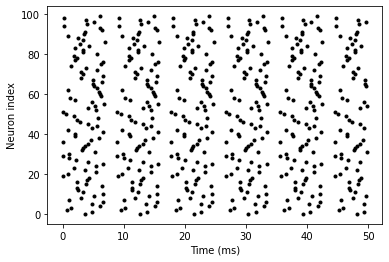

In [13]:
start_scope()

N = 100

G = NeuronGroup(N, eqs, threshold='v>V_th', reset='v=V_reset', refractory=2*ms, method='exact')
G.v = 'rand()*(V_th-V_rest)+V_rest'     # randomly assign the initial v;

spikemon = SpikeMonitor(G)

run(50*ms)

plt.plot(spikemon.t/ms, spikemon.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index');

This shows a few changes. Firstly, we've got a new variable ``N`` determining the number of neurons. Secondly, we added the statement ``G.v = 'rand()'`` before the run. What this does is initialise each neuron with a different uniform random value between 0 and 1. We've done this just so each neuron will do something a bit different. The other big change is how we plot the data in the end.

As well as the variable ``spikemon.t`` with the times of all the spikes, we've also used the variable ``spikemon.i`` which gives the corresponding neuron index for each spike, and plotted a single black dot with time on the x-axis and neuron index on the y-value. This is the standard "raster plot" used in neuroscience.

## Add Synapses

Once you have some neurons, the next step is to connect them up via synapses. We'll explore the simplest possible type of synapse that causes an instantaneous change in a variable after a spike.

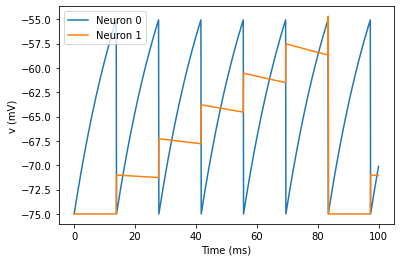

In [14]:
start_scope()

eqs = '''
dv/dt = (-g_L*(v-E_L) + I)/ C : volt
I : amp
C : farad
'''

G = NeuronGroup(2, eqs, threshold='v>V_th', reset='v = V_reset', method='exact')
G.v = V_rest
G.I = [2, 0]*nA
G.C = [1, 10]*nF

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, on_pre='v += 4*mV')
S.connect(i=0, j=1)

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plt.plot(M.t/ms, M.v[0]/mV, label='Neuron 0')
plt.plot(M.t/ms, M.v[1]/mV, label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)')
plt.legend();

There are a few things going on here. First of all, let's recap what is going on with the ``NeuronGroup``. We've created two neurons, each of which has the same differential equation but different values for parameters $I$ and $C_m$. Neuron 0 has ``I=2*nA`` and ``C_m=1*nF`` which means that is driven to repeatedly spike at a fairly high rate. Neuron 1 has ``I=0`` and ``C_m=10*nF`` which means that on its own - without the synapses - it won't spike at all (the driving current I is 0). You can prove this to yourself by commenting out the two lines that define the synapse.

Next we define the synapses: ``Synapses(source, target, ...)`` means that we are defining a synaptic model that goes from ``source`` to ``target``. In this case, the source and target are both the same, the group ``G``. The syntax ``on_pre='v += 2*mV'`` means that when a spike occurs in the presynaptic neuron (hence ``on_pre``) it causes an instantaneous change on postsynaptic neuron to happen ``v += 2*mV``. So in total, what this model says is that whenever two neurons in G are connected by a synapse, when the source neuron fires a spike the target neuron will have its value of ``v`` increased by 2*mV.

However, at this point we have only defined the synapse model, we haven't actually created any synapses. The next line ``S.connect(i=0, j=1)`` creates a synapse from neuron 0 to neuron 1.

## Adding a weight

In the previous section, we hard coded the weight of the synapse to be the value `2 mV`, but often we would to allow this to be different for different synapses. We do that by introducing synapse equations.

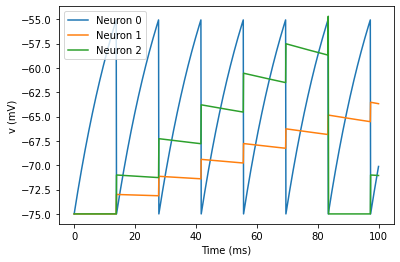

In [15]:
start_scope()

G = NeuronGroup(3, eqs, threshold='v>V_th', reset='v = V_reset', method='exact')
G.v = V_rest
G.I = [2, 0, 0]*nA
G.C = [1, 10, 10]*nF

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : volt', on_pre='v += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*2*mV'

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plt.plot(M.t/ms, M.v[0]/mV, label='Neuron 0')
plt.plot(M.t/ms, M.v[1]/mV, label='Neuron 1')
plt.plot(M.t/ms, M.v[2]/mV, label='Neuron 2')
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)')
plt.legend();

This example behaves very similarly to the previous example, but now there's a synaptic weight variable ``w``. The string ``'w : volt'`` is an equation string, precisely the same as for neurons, that defines a single dimensionless parameter ``w``. We changed the behaviour on a spike to ``on_pre='v_post += w'`` now, so that each synapse can behave differently depending on the value of ``w``. To illustrate this, we've made a third neuron which behaves precisely the same as the second neuron, and connected neuron 0 to both neurons 1 and 2. We've also set the weights via ``S.w = 'j*2*mV'``. When ``i`` and ``j`` occur in the context of synapses, ``i`` refers to the source neuron index, and ``j`` to the target neuron index. So this will give a synaptic connection from 0 to 1 with weight ``2*mV=1*2*mV`` and from 0 to 2 with weight ``4*mV=2*2*mV``.

## Introducing a delay

So far, the synapses have been instantaneous, but we can also make them act with a certain delay.

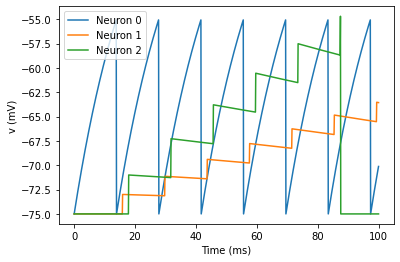

In [16]:
start_scope()

G = NeuronGroup(3, eqs, threshold='v>V_th', reset='v = V_reset', method='exact')
G.v = V_rest
G.I = [2, 0, 0]*nA
G.C = [1, 10, 10]*nF

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : volt', on_pre='v += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*2*mV'
S.delay = 'j*2*ms'

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plt.plot(M.t/ms, M.v[0]/mV, label='Neuron 0')
plt.plot(M.t/ms, M.v[1]/mV, label='Neuron 1')
plt.plot(M.t/ms, M.v[2]/mV, label='Neuron 2')
plt.xlabel('Time (ms)')
plt.ylabel('v (mV)')
plt.legend();

As you can see, that's as simple as adding a line ``S.delay = 'j*2*ms'`` so that the synapse from 0 to 1 has a delay of 2 ms, and from 0 to 2 has a delay of 4 ms

## More complex connectivity

So far, we specified the synaptic connectivity explicitly, but for larger networks this isn't usually possible. For that, we usually want to specify some condition.

In [17]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')
S = Synapses(G, G)
S.connect(condition='i!=j', p=0.2)

Here we've created a dummy neuron group of N neurons and a dummy synapses model that doens't actually do anything just to demonstrate the connectivity. The line ``S.connect(condition='i!=j', p=0.2)`` will connect all pairs of neurons ``i`` and ``j`` with probability 0.2 as long as the condition ``i!=j`` holds. So, how can we see that connectivity? Here's a little function that will let us visualise it.

In [18]:
#@title Utility function: visualize_connectivity()
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    fig, ax = plt.subplots(1,2, figsize=(10, 4))
    ax[0].plot(np.zeros(Ns), np.arange(Ns), 'ok', ms=10)
    ax[0].plot(np.ones(Nt), np.arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        ax[0].plot([0, 1], [i, j], '-k')
    ax[0].set_xticks([0, 1],)
    ax[0].set_xticklabels(['Source', 'Target'])
    ax[0].set_ylabel('Neuron index')
    ax[0].set_xlim(-0.1, 1.1)
    ax[0].set_ylim(-1, max(Ns, Nt))
    S_mat = np.ones((Nt, Ns))
    S_mat[S.j, S.i] = 0
    ax[1].pcolor(S_mat, cmap='gray', edgecolor='k')
    ax[1].invert_yaxis()
    ax[1].set_xlabel('Source neuron index')
    ax[1].set_ylabel('Target neuron index')
    ax[1].axis('scaled')
   

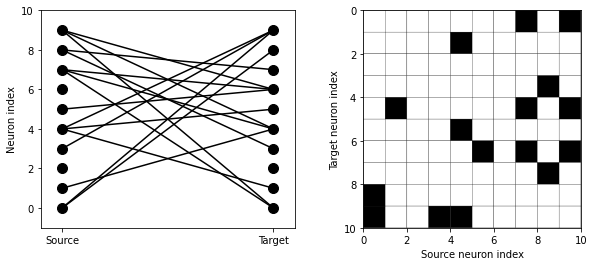

In [19]:
visualise_connectivity(S)

Please check [here](https://brian2.readthedocs.io/en/stable/resources/tutorials/2-intro-to-brian-synapses.html#more-complex-connectivity) for more complex connectivity.

## Simulate randomly connected network with 100 LIF neurons

Now, let's put all those pieces together and simulated a random network with 100 LIF neurons.

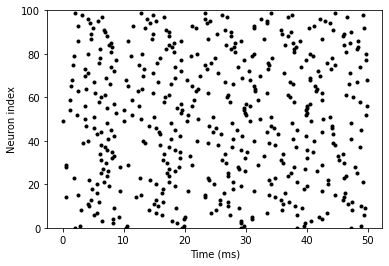

In [20]:
start_scope()

# define neuronal parameters
C_m = 0.5*nF
g_L = 25*nS
E_L = 10*mV 
V_rest = E_L
V_reset = V_rest
V_th = 30*mV
I_ext = 1*nA

# define the system of LIF model
eqs = '''
dv/dt = (-g_L*(v-E_L) + I_ext)/C_m : volt (unless refractory)
'''

N = 100

G = NeuronGroup(N, eqs, threshold='v>V_th', reset='v=V_reset', refractory=2*ms, method='euler')
G.v = 'rand()*(V_th-V_rest)+V_rest'
# G.v = V_rest

S = Synapses(G, G, on_pre='v+=0.5*mV', delay=2*ms)
S.connect(condition='i!=j', p=0.2)

spikemon = SpikeMonitor(G)

run(50*ms)

plt.plot(spikemon.t/ms, spikemon.i, '.k')
plt.ylim(0,N)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index');

Note that we also changed the `method` keyword argument to use `'euler'` (which stands for the [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method)); the 'exact' method that we used earlier is not applicable to those stochastic differential equations.


## Coding Exercise 1: Simulate LIF network containing both excitatory and inhibitory neurons.


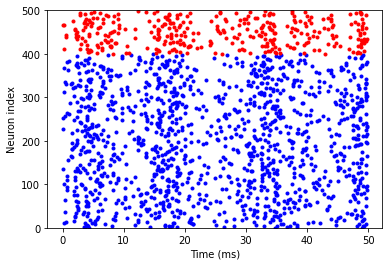

In [21]:
start_scope()

# USE these parameters. (Of course, you can try other values latter.)
C_m = 0.5*nF
g_L = 25*nS
E_L = 10*mV 
V_rest = E_L
V_reset = V_rest
V_th = 30*mV
I_ext = 1*nA

# define the system of LIF model
eqs = '''
dv/dt = (-g_L*(v-E_L) + I_ext)/C_m : volt (unless refractory)
'''

N_E = 400
N_I = 100

G_E = NeuronGroup(N_E, eqs, threshold='v>V_th', reset='v=V_reset', refractory=2*ms, method='euler')
G_I = NeuronGroup(N_I, eqs, threshold='v>V_th', reset='v=V_reset', refractory=2*ms, method='euler')
G_E.v = 'rand()*(V_th-V_rest)+V_rest'
G_I.v = 'rand()*(V_th-V_rest)+V_rest'

S_EE = Synapses(G_E, G_E, on_pre='v+=0.5*mV',   delay=2*ms)
S_IE = Synapses(G_E, G_I, on_pre='v+=0.5*mV',   delay=2*ms)
S_EI = Synapses(G_I, G_E, on_pre='v-=0.5*mV*4', delay=2*ms)
S_II = Synapses(G_I, G_I, on_pre='v-=0.5*mV*4', delay=2*ms)
for S in (S_EE, S_IE, S_EI, S_II):
    S.connect(condition='i!=j', p=0.1)

spikemon_E = SpikeMonitor(G_E)
spikemon_I = SpikeMonitor(G_I)

run(50*ms)

plt.plot(spikemon_E.t/ms, spikemon_E.i, '.b')
plt.plot(spikemon_I.t/ms, spikemon_I.i+N_E, '.r')
plt.ylim(0,N_E+N_I)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index');

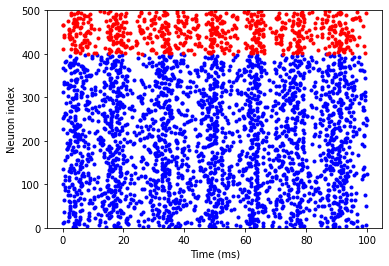

In [22]:
run(50*ms)

plt.plot(spikemon_E.t/ms, spikemon_E.i, '.b')
plt.plot(spikemon_I.t/ms, spikemon_I.i+N_E, '.r')
plt.ylim(0,N_E+N_I)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index');


## Explore different dynamical states of E-I LIF networks

**Reference:**
Brunel, N. (2000). Phase diagrams of sparsely connected networks of excitatory and inhibitory spiking neurons. Neurocomputing, 32–33, 307–312. https://doi.org/10.1016/S0925-2312(00)00179-X

- **Synchronous regular (SR) states**: where neurons are almost fully synchronized in a few clusters and behave as oscillators when excitation dominates inhibition and synaptic time distributions are sharply peaked;
- **Asynchronous regular (AR) states**: with stationary global activity and quasiregular individual neuron firing when excitation dominates inhibition and synaptic time distributions are broadly peaked;
- **Asynchronous irregular (AI) states**: with stationary global activity but strongly irregular individual firing at low rates when inhibition dominates excitation in an intermediate range of external frequencies; 
- **Synchronous irregular (SI) states**: with oscillatory global activity but strongly irregular individual firing at low (compared to the global oscillation frequency) firing rates, when inhibition dominates excitation and either low external frequencies (slow oscillations) or high external frequencies (fast oscillations). When the average synaptic time constant is high enough, these two regions merge together.

## Coding Exercise: Tuning parameters to achieve SI state.

In [23]:
start_scope()

# USE these parameters. (Of course, you can try other values latter)
tau_m = 20*ms       # membrane time constant
V_reset = 10*mV     # reset potential 
V_th = 20*mV        # threshold potential
J = 0.2*mV          # EPSP
g = 6               # ratio of IPSP/EPSP
delay=1.8*ms        # synaptic transimition delay
ext_ratio = 0.9     # ratio of nu_ext/nu_th
p = 0.1             # connectivity probability

# define the system of LIF model
eqs = '''
dv/dt = -v/tau_m : volt (unless refractory)
'''

ratio = 4
N_I = 2500
N_E = N_I*ratio

# write your own code to construct the network


# define external Poisson drive 
nu_th = V_th/(p*N_E*J*tau_m)
Poisson_E = PoissonGroup(N_E, rates=nu_th*N_E*p*ext_ratio)
Poisson_I = PoissonGroup(N_I, rates=nu_th*N_E*p*ext_ratio)

# Also use Synapses to inject outputs from PoissonGroup to NeuronGroup

# write your own code to run simulation and plot the results


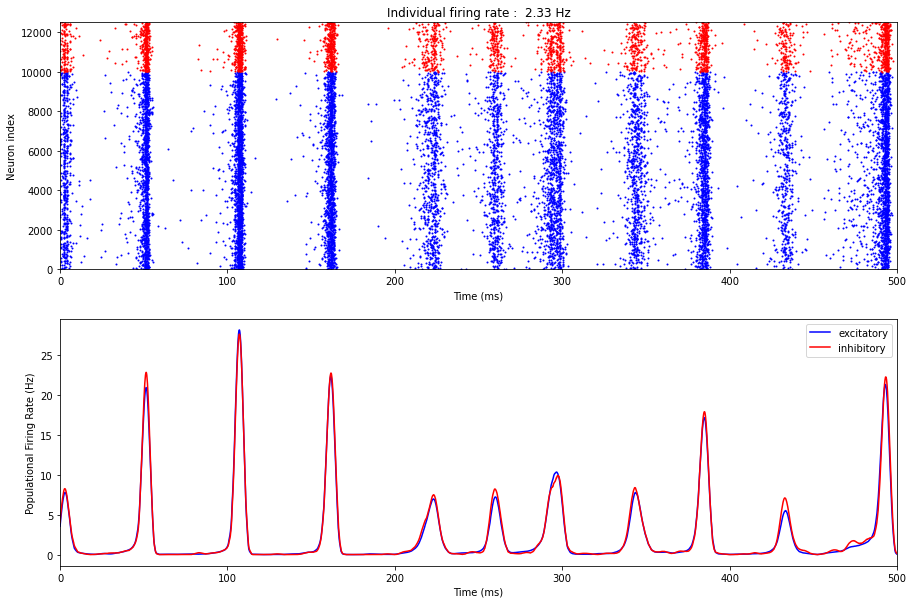

In [24]:
# to_remove solution

start_scope()

# USE these parameters. (Of course, you can try other values latter)
tau_m = 20*ms       # membrane time constant
V_reset = 10*mV     # reset potential 
V_th = 20*mV        # threshold potential
J = 0.2*mV          # EPSP
g = 6               # ratio of IPSP/EPSP
delay=1.8*ms        # synaptic transimition delay
ext_ratio = 0.9     # ratio of nu_ext/nu_th
p = 0.1             # connectivity probability

# define the system of LIF model
eqs = '''
dv/dt = -v/tau_m : volt (unless refractory)
'''

ratio = 4
N_I = 2500
N_E = N_I*ratio

# write your own code to construct the network
G_E = NeuronGroup(N_E, eqs, threshold='v>V_th', reset='v=V_reset', refractory=2*ms, method='euler')
G_I = NeuronGroup(N_I, eqs, threshold='v>V_th', reset='v=V_reset', refractory=2*ms, method='euler')
G_E.v = 'rand()*V_th'
G_I.v = 'rand()*V_th'

S_EE = Synapses(G_E, G_E, 'w:volt',  on_pre='v+=w', delay=delay)
S_IE = Synapses(G_E, G_I, 'w:volt',  on_pre='v+=w', delay=delay)
S_EI = Synapses(G_I, G_E, 'w:volt',  on_pre='v-=w', delay=delay)
S_II = Synapses(G_I, G_I, 'w:volt',  on_pre='v-=w', delay=delay)


for S in (S_EE, S_II):
    S.connect(condition='i!=j', p=p)
for S in (S_IE, S_EI):
    S.connect(p=p)

for S in (S_EE, S_IE):
    S.w = J 
for S in (S_EI, S_II):
    S.w = J*g

# define external Poisson drive 
nu_th = V_th/(p*N_E*J*tau_m)
Poisson_E = PoissonGroup(N_E, rates=nu_th*N_E*p*ext_ratio)
Poisson_I = PoissonGroup(N_I, rates=nu_th*N_E*p*ext_ratio)

# Also use Synapses to inject outputs from PoissonGroup to NeuronGroup
SP_E = Synapses(Poisson_E, G_E, on_pre='v+=J')
SP_I = Synapses(Poisson_I, G_I, on_pre='v+=J')
SP_E.connect(condition='i==j')
SP_I.connect(condition='i==j')

# write your own code to run simulation and plot the results

# define Monitors
spikemon_E = SpikeMonitor(G_E)
spikemon_I = SpikeMonitor(G_I)
pop_E = PopulationRateMonitor(G_E)
pop_I = PopulationRateMonitor(G_I)

# run simulation
T=500*ms
run(T)

fig, ax = plt.subplots(2,1, figsize=(15,10))
ax[0].plot(spikemon_E.t/ms, spikemon_E.i, '.b', ms=2)
ax[0].plot(spikemon_I.t/ms, spikemon_I.i+N_E, '.r', ms=2)
ax[0].set_xlim(0, T/ms)
ax[0].set_ylim(0,N_E+N_I)
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Neuron index')
ax[0].set_title(f'Individual firing rate : {(spikemon_E.i.shape[0] + spikemon_I.i.shape[0])/(N_E+N_I)/T/Hz:5.2f} Hz')

ax[1].plot(pop_E.t / ms, pop_E.smooth_rate(width=2 * ms) / Hz, color='b', label='excitatory')
ax[1].plot(pop_I.t / ms, pop_I.smooth_rate(width=2 * ms) / Hz, color='r', label='inhibitory')
ax[1].legend()
ax[1].set_xlim(0, T/ms)
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Populational Firing Rate (Hz)');

Once you got the network in **SI** state, you may also try other three dynamical state, and check whether the parameter `g` and `ext_ratio`($\nu_{ext}/\nu_{th}$) you got consists with the phase diagram in Brunel's paper.


## End of tutorial